# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [27]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
#clean_hospital_read_df['Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
#pd.to_numeric(clean_hospital_read_df['Number of Discharges'])
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

clean_hospital_read_df = clean_hospital_read_df[(clean_hospital_read_df['Excess Readmission Ratio'].notnull())]

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


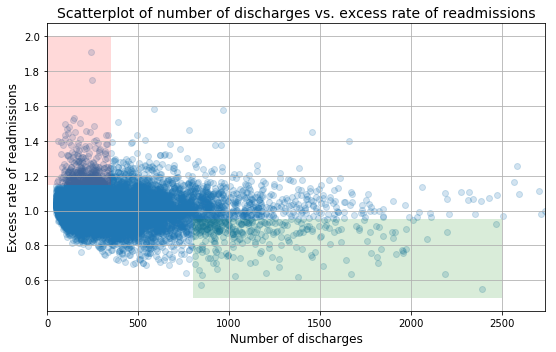

In [28]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [5]:
# Your turn

In [42]:
jc_df = clean_hospital_read_df[['Provider Number', 'Number of Discharges', 'Excess Readmission Ratio']]
jc_df.head()

,Provider Number,Number of Discharges,Excess Readmission Ratio
1832,210035,25,1.0914
1699,210061,27,1.0961
1774,210008,28,1.0934
1853,50071,29,1.0908
1290,390019,30,1.1123


In [26]:
clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'].notnull()]

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013
1602,TENNOVA HEALTHCARE-JEFFERSON MEMORIAL HOSPITAL,440056,TN,READM-30-AMI-HRRP,31,NaN,1.0992,24.2,22.1,13.0,07/01/2010,06/30/2013
2048,FORT MADISON COMMUNITY HOSPITAL,160122,IA,READM-30-AMI-HRRP,33,NaN,1.0847,22.6,20.9,12.0,07/01/2010,06/30/2013
2441,ISLAND HOSPITAL,500007,WA,READM-30-AMI-HRRP,34,NaN,1.0738,20.8,19.3,11.0,07/01/2010,06/30/2013
2512,NORTH CENTRAL BRONX HOSPITAL,330385,NY,READM-30-HF-HRRP,34,NaN,1.0720,23.3,21.8,12.0,07/01/2010,06/30/2013
2825,KAISER FOUNDATION HOSPITAL FONTANA,50140,CA,READM-30-PN-HRRP,34,NaN,1.0651,20.7,19.4,11.0,07/01/2010,06/30/2013


In [90]:
jc_df.describe()

,Provider Number,Number of Discharges,Excess Readmission Ratio,NumDis_bucket
count,11497.000000,11497.000000,11497.000000,11497.000000
mean,257571.540141,365.466209,1.007504,315.116987
std,154274.374018,308.754590,0.091964,310.144065
min,10001.000000,25.000000,0.549500,0.000000
25%,110129.000000,160.000000,0.952600,100.000000
50%,250042.000000,282.000000,1.003500,200.000000
75%,390039.000000,474.000000,1.058100,400.000000
max,670082.000000,6793.000000,1.909500,6700.000000


In [ ]:
#scatterplots tend to highlight the outliers rather than the averages

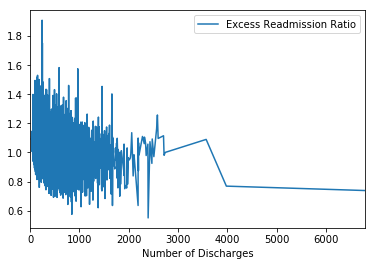

In [37]:
jc_df.plot(x='Number of Discharges', y = 'Excess Readmission Ratio')

In [43]:
jc_df['NumDis_bucket'] = jc_df['Number of Discharges'] // 100 * 100

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [44]:
jc_df

,Provider Number,Number of Discharges,Excess Readmission Ratio,NumDis_bucket
1832,210035,25,1.0914,0
1699,210061,27,1.0961,0
1774,210008,28,1.0934,0
1853,50071,29,1.0908,0
1290,390019,30,1.1123,0
1602,440056,31,1.0992,0
2048,160122,33,1.0847,0
2441,500007,34,1.0738,0
2512,330385,34,1.0720,0
2825,50140,34,1.0651,0


In [94]:
jc_df_grp = jc_df.groupby('NumDis_bucket')['Excess Readmission Ratio'].agg(['mean','median','size'])
jc_df_grp = jc_df_grp.reset_index()

In [95]:
jc_df_grp

,NumDis_bucket,mean,median,size
0,0,1.022618,1.01775,1188
1,100,1.011768,1.00140,2729
2,200,1.012771,1.00430,2191
3,300,1.004387,0.99870,1655
4,400,1.004151,1.00130,1120
5,500,0.997758,0.99400,820
6,600,1.004477,1.00500,546
7,700,0.999382,1.00110,345
8,800,0.998139,1.01040,259
9,900,0.986313,0.98185,180


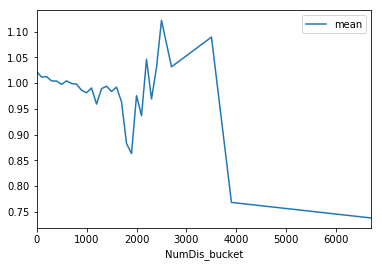

In [92]:
jc_df_grp.plot(x='NumDis_bucket', y = 'mean')

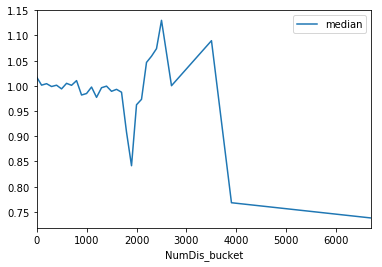

In [96]:
jc_df_grp.plot(x='NumDis_bucket', y = 'median')

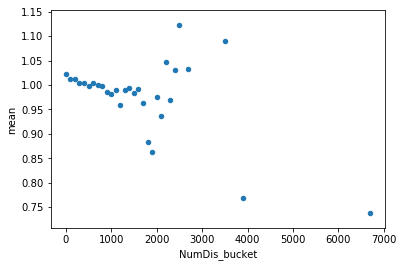

In [89]:
jc_df_grp.plot(x='NumDis_bucket', y='mean', kind='scatter')

# A. Do you agree with the above analysis and recommendations? Why or why not?

As we can see by averaging the groups of hospitals of similar sizes, we can see that while the excess readmission ratio goes down slightly as the size of the hospital decreases, the variance is too great to make a specific policy recommendation that won't adversely affect hospitals with low ratios.  In fact, several large hospitals have very high excess readmission ratios, so incentivizing hospitals to combine does not necessarily decrease this ratio.

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

###  1. Setup an appropriate hypothesis test.

###  2. Compute and report the observed significance value (or p-value).
###  3. Report statistical significance for α = .01. 
###  4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
###  5. Look at the scatterplot above. 
###      What are the advantages and disadvantages of using this plot to convey information?
###      Construct another plot that conveys the same information in a more direct manner.